
# Bayesian Inference

by Emil Vassev

February 9, 2023
<br><br>
Copyright (C) 2023 - All rights reserved, do not copy or distribute without permission of the author.
***

<span style="color:blue">Welcome to <b>Introduction to Bayesian Inference with Python</b>, an interactive lecture designed to give you examples of implementing Bayesian Inference problems in Python.</span>

## Bayes’ Theorem

A principled way of calculating a conditional probability without using the composite probability P(E∩F).

<pre>
              P(F|E) * P(E)
   P(E|F) = -----------------
		          P(F)                                 
</pre>

Terms:
* P(E|F): Posterior probability
* P(E): Prior probability
* P(F|E): Likelihood probability
* P(F): Evidence probability

If we do not have a direct access to the denominator P(F), we can calculate it by using the partition rule:

<pre>
   P(F) = P(F∩E)  + P(F∩E<sup>c</sup>) 
</pre>

<pre>
   P(F) = P(E)*P(F|E) + P(E<sup>c</sup>)*P(F|E<sup>c</sup>)
</pre>

<pre>
                      P(F|E) * P(E)
   P(E|F) = --------------------------------
		       P(E)*P(F|E) + P(E<sup>c</sup>)*P(F|E<sup>c</sup>)     
</pre>


<span style="color:red">Bayes’ Theorem cannot be used for independent events as we need to determine the total probability and there is no dependency of events.</span>

Example:
```python
X: Find out the probability of having a liver disease if patients are an alcoholic. 
    
Litmus test for liver disease:
* P(A) = 0.10 (past data tells you that 10% of patients entering your clinic “have liver disease”)
* P(B) = 0.05 (5% of the clinic’s “patients are alcoholics”)
* P(B|A) = 0.07 (among those patients diagnosed with liver disease, 7% are alcoholics)
* P(A|B) = ?

              P(B|A) * P(A)       0.07 * 0.10
   P(A|B) = ----------------- = ----------------- = 0.14 = 14% 
		          P(B)                0.05
```

## Bayes' Theorem in Python

We can create the following simple functions to implement Bayes’ Theorem in Python:

In [1]:
def bayes_theorem_1(pA, pB, pBA):
    return (pBA * pA) / pB


def bayes_theorem_2(pA, pBA, pAc, pBAc):
    return (pBA * pA) / (pA*pBA + pAc*pBAc)

In [2]:
pA = 0.10 #past data tells you that 10% of patients entering your clinic “have liver disease”
pB = 0.05 #5% of the clinic’s “patients are alcoholics”
pBA = 0.07 #among those patients diagnosed with liver disease, 7% are alcoholics

pAB = bayes_theorem_1(pA, pB, pBA)

print(pAB)

0.14


Example: 
```python
X: There are two bags. Bag I has 7 red and 4 blue balls and bag II has 5 red and 9 blue balls. We draw a ball at random and it turns out to be red. Determine the probability that the ball was from the bag I using the Bayes’ Theorem.

Events:    
* X – ball is from bag I 
* Y – ball is from bag II
* A – red ball 
* P(X) = P(Y) = ½
* P(A|X) = 7/11
* P(A|Y) = 5/14
* P(X|A) = ?
* P(A) is missing
```
<pre>

              P(A|X) * P(X)              P(A|X) * P(X)
   P(X|A) = ----------------- = ------------------------------  
		          P(A)            P(X)*P(A|X) + P(X<sup>c</sup>)*P(A|X<sup>c</sup>) 
</pre>

```python
                     P(A|X) * P(X)                  7/11*1/2            0.31818181818
   P(X|A) = ------------------------------ = ---------------------- = ------------------ = 0.64052287581
		      P(X)*P(A|X) + P(Y)*P(A|Y)        1/2*7/11 + 1/2*5/14      0.49675324675

```

In [3]:
pX = pY = pXc = 1/2
pAX = 7/11
pAXc = pAY = 5/14

pXA = bayes_theorem_2(pX, pAX, pXc, pAXc)

print(pXA)

0.6405228758169935


## Probability Distribution for a Random Variable

* Describes how the probabilities are distributed over the values of the random variable.
* For a discrete random variable X the probability distribution is defined by a *probability mass function* (PMF), denoted by Fx(X). 
* Fx(X) - provides the probability for each value of the random variable 
```
	Fx(X) = px(x) = P(X=x) for each x within the range of X
    
    Here P(X=x) is the probability of X=x
```

Rules for mass function Fx(X) for a discrete random variable X:
1. Fx(X) ≥ 0 - must be nonnegative for each value of the random variable X
2. Σx px(x) = 1 , sum of probabilities for each value of the random variable must = 1

## Bayesian Inference

Inference - using statistics to deduce properties about a probability distribution from data.

Bayes’ Theorem works not on events but on distributions:
* Θ - set of parameters
* P(Θ) - prior distribution, or distribution of our belief about the true value of Θ
* P(Θ|data) - posterior distribution, or distribution of our belief about Θ after we have taken the observed data into account
* P(data|Θ) - likelihood distribution measures the degree to which data supports Θ
* P(data) - normalization distribution, i.e., is the total probability of the data taking into account all possible hypotheses 
<pre>
              P(data|Θ) * P(Θ)
   P(Θ|data) = -----------------
		          P(data)                                 
</pre>

When we have some data, we need to decide on the model used to generate our data. 

Deciding which model to use can be obvious, but also it could be the most complex part of the inference problem:

* *Normal* distribution when modelling natural phenomena like human heights.
* *Beta* distribution when modelling probability distributions.
* *Poisson* distribution when modelling the frequency of events occurring.

Each of these distribution has parameters Θ:
* $\alpha$ and $\beta$ for the Beta distribution
* $\lambda$ for the Poisson
* $\mu$ and $\sigma$ for the Normal distribution

The goal of inference is to find the best values for these parameters.

Example (this example is an elaborated version of <a href = "https://notebook.community/datapythonista/datapythonista.github.io/docs/Bayesian%20inference%20tutorial" target="new">Bayesian inference tutorial: a hello world example</a>:

* Data: $data$ = [166, 168, 170, 172, 174, 176, 178, 180, 182, 184]
* A model: the normal distribution
* The parameters of the model: $\mu$ (mean) and $\sigma$ (standard deviation)

Objective: Find the best values for $\mu$ and $\sigma$ for the $data$, e.g., $\mu=175$ and $\sigma=5$

Objective: Find $Θ$ = {$\mu$, $\sigma$}, so to calculate the highest probability P(Θ|data)

* P(Θ) - prior distribution, or distribution of our belief about the true value of Θ
* P(Θ|data) - posterior distribution, or distribution of our belief about Θ after we have taken the observed data into account
* P(data|Θ) - likelihood distribution measures the degree to which data supports Θ


In [4]:
sample = [150, 156, 160, 162, 168, 174, 178, 180, 182, 184]

### Calculate the Prior Distribution  $𝑃(Θ)$

The prior distribution - knowledge of the parameters before we observe the $data$. Here, we need to know the nature of our data, and eventualy use a uniform distribution (probability distribution with equally likely outcomes) for the prior distribution and let the process find the parameters by using the data.

If we look at the data, this could be data of human heights. Considering the maximum known human height, which is 272 cm, the range could be between $40$cm and $272$cm. 

In the case of a normal distribution, the formula to compute the probability given $x$ (its probability density function) is:

$$P(data|\theta) = P(data| \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \cdot e^{-\frac{(data - \mu)^2}{2 \sigma^2}}$$

What we need, is a set of parameters $\mu$ (mean) and $\sigma$ (standard deviation) for the prior normal distribution:
* The mean of the height of the world population is 165 cm. 
* The standard deviation of the world population is 7 cm.

In [5]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

world_height_mean = 165
world_height_standard_deviation = 7

world_max_height = 272
world_min_height = 40
num_of_heights = world_max_height - world_min_height+1

height = np.linspace(world_min_height, world_max_height, num_of_heights)

pPrior = st.norm.pdf(height, world_height_mean, world_height_standard_deviation)

print(pPrior)

[3.25410544e-71 4.12946824e-70 5.13444479e-69 6.25503426e-68
 7.46625373e-67 8.73197823e-66 1.00059745e-64 1.12342216e-63
 1.23584335e-62 1.33205058e-61 1.40674328e-60 1.45561269e-59
 1.47575296e-58 1.46594725e-57 1.42678938e-56 1.36062435e-55
 1.27131584e-54 1.16387282e-53 1.04398544e-52 9.17529851e-52
 7.90101364e-51 6.66626030e-50 5.51084977e-49 4.46366633e-48
 3.54243362e-47 2.75453672e-46 2.09861252e-45 1.56658080e-44
 1.14580361e-43 8.21115824e-43 5.76548045e-42 3.96646323e-41
 2.67367250e-40 1.76583383e-39 1.14268968e-38 7.24508731e-38
 4.50086296e-37 2.73958515e-36 1.63384428e-35 9.54714176e-35
 5.46604152e-34 3.06626248e-33 1.68532079e-32 9.07596214e-32
 4.78894247e-31 2.47584477e-30 1.25413431e-29 6.22445795e-29
 3.02688465e-28 1.44220518e-27 6.73279017e-27 3.07964003e-26
 1.38019890e-25 6.06066457e-25 2.60756814e-24 1.09922838e-23
 4.54022152e-23 1.83739700e-22 7.28560814e-22 2.83051501e-21
 1.07746200e-20 4.01860493e-20 1.46853908e-19 5.25814493e-19
 1.84466048e-18 6.340699

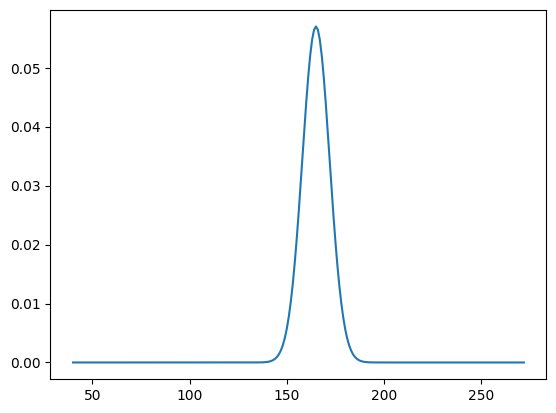

In [6]:
plt.plot(height, pPrior)
plt.show()

### Calculate the Likelihood Distribution $P(data|Θ)$ 

The likelihood is the probability of obtaining the $data$ (sample) from the choosen model (e.g. the normal distribution) and for a specific set of parameters $\theta$ (e.g. $\mu=165$ and $\sigma=7$).

In [7]:
def compute_likelihood_normal_distrbution(data, mu, sigma):
    return st.norm.pdf(data, mu, sigma)

mu = world_height_mean
sigma = world_height_standard_deviation

pLikelihood = compute_likelihood_normal_distrbution(sample, mu, sigma)

print(pLikelihood)

[0.0057373  0.02493758 0.04415934 0.05199096 0.05199096 0.02493758
 0.01015958 0.0057373  0.00298598 0.00143223]


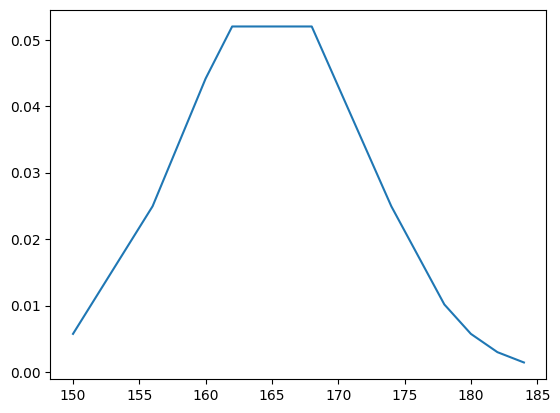

In [8]:
plt.plot(sample, pLikelihood)
plt.show()

The probability of each value of 

$data$ = [150, 156, 160, 162, 168, 174, 178, 180, 182, 184] 

was generated by a Normal distribution with mean 165 and standard deviation 7 is:

[0.0057373  0.02493758 0.04415934 0.05199096 0.05199096 0.02493758
 0.01015958 0.0057373  0.00298598 0.00143223]

### Calculate the Normalization  Distribution  $𝑃(data)$

A "uniform distribution" means all possible outcomes in the range have equal probability of occurring. 

For a uniform normalization all the values in this range could be with equal probability.

In [9]:
pNormalization = st.randint.pmf(height, world_min_height, world_max_height+1)

print(pNormalization)

[0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185
 0.00429185 0.00429185 0.00429185 0.00429185 0.00429185 0.0042

In [10]:
def extract_probability(data, probabilities, start_height): 
    pResult = []
    for element in data:
        pResult.append(probabilities[element-start_height])
        
    return pResult

In [11]:
pPriorData = extract_probability(sample, pPrior, world_min_height)
pNormalizationData = extract_probability(sample, pNormalization, world_min_height)

pPosterior = pLikelihood*pPriorData/pNormalizationData

print(pPosterior)

[7.66956296e-03 1.44898739e-01 4.54361114e-01 6.29812968e-01
 6.29812968e-01 1.44898739e-01 2.40495618e-02 7.66956296e-03
 2.07744170e-03 4.77949323e-04]


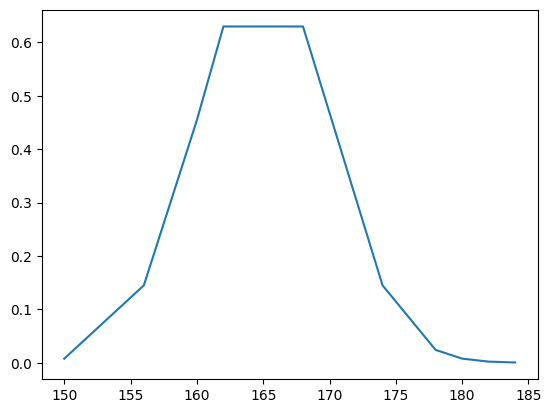

In [12]:
plt.plot(sample, pPosterior)
plt.show()